In [1]:
library(dplyr)
library(stringr)
library(ggplot2)
library(ggrepel)
library(reshape2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'reshape2' was built under R version 4.2.3"


# Preparation

In [2]:
#initialize ticker variables 
universe = c('IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP')
universe_div = c('IBM','MSFT','AAPL','ORCL','SAP')

In [3]:
#read in data 
all = list()
all_div = list()
for (i in universe) {
    x = paste(i,".csv", sep="")
    df = read.csv(x)
    all[[i]] = df
    }
for (i in universe_div) {
    x = paste(i,"div.csv", sep="")
    df = read.csv(x)
    all_div[[i]] = df
    }


In [4]:
for (i in universe) {
  assign(i, all[[i]])
}

for(i in universe_div){
    assign(paste0(i,"_div"), all_div[[i]])
                    }
IBM_div$Date = as.Date(IBM_div$Date, format = "%m/%d/%Y")
MSFT_div$Date = as.Date(MSFT_div$Date, format = "%m/%d/%Y")
AAPL_div$Date = as.Date(AAPL_div$Date, format = "%m/%d/%Y")
ORCL_div$Date = as.Date(ORCL_div$Date, format = "%m/%d/%Y")
SAP_div$Date = as.Date(SAP_div$Date, format = "%m/%d/%Y")


# Retrieve the "Close" and "Adj Close" values for each stock


In [5]:
head(IBM[,c(1,5,6)])

,Date,Close,Adj.Close
,<chr>,<dbl>,<dbl>
1,1/2/2018,147.4665,113.0867
2,1/3/2018,151.5201,116.1952
3,1/4/2018,154.5889,118.5486
4,1/5/2018,155.3442,119.1278
5,1/8/2018,156.2811,119.8463
6,1/9/2018,156.6252,120.1102


In [6]:
#merge all individual df's together 
merged = merge(IBM[,c(1,5,6)], MSFT[,c(1,5,6)], by = "Date", suffixes = c("_IBM", "_MSFT"))
for (i in universe[3:length(universe)]){
    df = get(i)
    col_names = names(df)[c(5,6)]
    new_col_names = paste0(col_names, "_", i)
    names(df)[c(5,6)] = new_col_names 
    merged = merge(merged, df[,c(1,5,6)], by = "Date")
}

In [7]:
#change "Date" column to Date format 
merged$Date = as.Date(merged$Date, format = "%m/%d/%Y")
head(merged)

,Date,Close_IBM,Adj.Close_IBM,Close_MSFT,Adj.Close_MSFT,Close_GOOG,Adj.Close_GOOG,Close_AAPL,Adj.Close_AAPL,Close_AMZN,⋯,Close_FB,Adj.Close_FB,Close_NFLX,Adj.Close_NFLX,Close_TSLA,Adj.Close_TSLA,Close_ORCL,Adj.Close_ORCL,Close_SAP,Adj.Close_SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-10,156.9599,120.3668,87.82,82.31483,55.1305,55.1305,43.5725,41.31276,62.7165,⋯,187.84,187.84,212.52,212.52,22.32000,22.32000,48.80,44.74147,112.87,101.64254
2,2018-01-11,156.9790,120.3815,88.08,82.55853,55.2760,55.2760,43.8200,41.54743,63.8340,⋯,187.77,187.77,217.24,217.24,22.53000,22.53000,48.95,44.87899,109.64,98.73383
3,2018-01-12,155.9656,119.6043,89.60,83.98323,56.1130,56.1130,44.2725,41.97647,65.2600,⋯,179.37,179.37,221.23,221.23,22.41467,22.41467,49.51,45.39242,110.13,99.17509
4,2018-01-16,156.6444,120.1249,88.35,82.81162,56.0880,56.0880,44.0475,41.76313,65.2430,⋯,178.39,178.39,221.53,221.53,22.67067,22.67067,49.59,45.46577,110.68,99.67039
5,2018-01-17,161.2333,123.6439,90.14,84.48939,56.5990,56.5990,44.7750,42.45291,64.7500,⋯,177.60,177.60,217.50,217.50,23.14400,23.14400,50.27,46.08921,111.19,100.12965
6,2018-01-18,161.6826,123.9885,90.10,84.45190,56.4895,56.4895,44.8150,42.49084,64.6660,⋯,179.80,179.80,220.33,220.33,22.97133,22.97133,50.23,46.05253,111.67,100.56190


In [8]:
###FINAL DF FOR THIS SECTION###

#sorting, changing prices to contain every fifth day 
prices = arrange(merged, Date)
prices2 = prices
prices = prices[seq(1, nrow(df), 5), ]
prices2

Date,Close_IBM,Adj.Close_IBM,Close_MSFT,Adj.Close_MSFT,Close_GOOG,Adj.Close_GOOG,Close_AAPL,Adj.Close_AAPL,Close_AMZN,⋯,Close_FB,Adj.Close_FB,Close_NFLX,Adj.Close_NFLX,Close_TSLA,Adj.Close_TSLA,Close_ORCL,Adj.Close_ORCL,Close_SAP,Adj.Close_SAP
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,147.4665,113.0867,85.95,80.56204,53.2500,53.2500,43.0650,40.83159,59.4505,⋯,181.42,181.42,201.07,201.07,21.36867,21.36867,46.63,42.58610,112.39,101.21028
2018-01-03,151.5201,116.1952,86.35,80.93695,54.1240,54.1240,43.0575,40.82447,60.2100,⋯,184.67,184.67,205.05,205.05,21.15000,21.15000,47.71,43.57244,113.31,102.03877
2018-01-04,154.5889,118.5486,87.11,81.64934,54.3200,54.3200,43.2575,41.01411,60.4795,⋯,184.33,184.33,205.63,205.63,20.97467,20.97467,48.18,44.00167,115.05,103.60569
2018-01-05,155.3442,119.1278,88.19,82.66164,55.1115,55.1115,43.7500,41.48107,61.4570,⋯,186.85,186.85,209.99,209.99,21.10533,21.10533,48.47,44.26653,116.33,104.75836
2018-01-08,156.2811,119.8463,88.28,82.74599,55.3470,55.3470,43.5875,41.32699,62.3435,⋯,188.28,188.28,212.05,212.05,22.42733,22.42733,48.98,44.73230,114.80,103.38056
2018-01-09,156.6252,120.1102,88.22,82.68976,55.3130,55.3130,43.5825,41.32225,62.6350,⋯,187.87,187.87,209.31,209.31,22.24600,22.24600,49.06,44.97985,114.16,102.80422
2018-01-10,156.9599,120.3668,87.82,82.31483,55.1305,55.1305,43.5725,41.31276,62.7165,⋯,187.84,187.84,212.52,212.52,22.32000,22.32000,48.80,44.74147,112.87,101.64254
2018-01-11,156.9790,120.3815,88.08,82.55853,55.2760,55.2760,43.8200,41.54743,63.8340,⋯,187.77,187.77,217.24,217.24,22.53000,22.53000,48.95,44.87899,109.64,98.73383
2018-01-12,155.9656,119.6043,89.60,83.98323,56.1130,56.1130,44.2725,41.97647,65.2600,⋯,179.37,179.37,221.23,221.23,22.41467,22.41467,49.51,45.39242,110.13,99.17509


# 5 Days Rebalancing of Buying Low

In [9]:
#calculate %change
percent_change_df = data.frame(Date = merged$Date)
for (i in universe){
    change = arrange(merged,Date) %>% transmute(Date, change = get(paste0("Adj.Close_", i))/lag(get(paste0("Adj.Close_", i)), n=5)) 
    percent_change_df <- merge(percent_change_df, change, by = "Date")
}

Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the 

In [10]:
#change column names 
names(percent_change_df)= c("Date", "5Day%Change_IBM","5Day%Change_MSFT","5Day%Change_GOOG", "5Day%Change_AAPL", "5Day%Change_AMZN","5Day%Change_FB", "5Day%Change_NFLX","5Day%Change_TSLA","5Day%Change_ORCL","5Day%Change_SAP")

In [11]:
percent_change_df

Date,5Day%Change_IBM,5Day%Change_MSFT,5Day%Change_GOOG,5Day%Change_AAPL,5Day%Change_AMZN,5Day%Change_FB,5Day%Change_NFLX,5Day%Change_TSLA,5Day%Change_ORCL,5Day%Change_SAP
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-04,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-05,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-08,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-09,1.0621071,1.0264109,1.0387418,1.0120167,1.0535655,1.0355528,1.0409807,1.0410569,1.0562096,1.0157488
2018-01-10,1.0359013,1.0170241,1.0185962,1.0119607,1.0416293,1.0171657,1.0364301,1.0553191,1.0268296,0.9961168
2018-01-11,1.0154608,1.0111352,1.0175994,1.0130034,1.0554651,1.0186622,1.0564606,1.0741530,1.0199383,0.9529769
2018-01-12,1.0040004,1.0159879,1.0181722,1.0119427,1.0618807,0.9599678,1.0535263,1.0620381,1.0254342,0.9467033


In [12]:
#selling days 
every_fifth_day= percent_change_df[seq(1, nrow(df), 5), ]
every_fifth_day

,Date,5Day%Change_IBM,5Day%Change_MSFT,5Day%Change_GOOG,5Day%Change_AAPL,5Day%Change_AMZN,5Day%Change_FB,5Day%Change_NFLX,5Day%Change_TSLA,5Day%Change_ORCL,5Day%Change_SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,1.0621071,1.0264109,1.0387418,1.0120167,1.0535655,1.0355528,1.0409807,1.0410569,1.0562096,1.0157488
11,2018-01-17,1.0294209,1.0217636,1.0232495,1.0273620,1.0337671,0.9453346,1.0391286,1.0403668,1.0246636,0.9739838
16,2018-01-24,0.9805513,1.0186376,1.0284988,0.9727527,1.0482703,1.0503941,1.2013793,0.9963418,1.0234733,1.0285998
21,2018-01-31,0.9899017,1.0347420,1.0048959,0.9610261,1.0687877,1.0018225,1.0344432,1.0243430,1.0027212,0.9902072
26,2018-02-07,0.9398289,0.9431641,0.8962682,0.9528759,0.9764902,0.9640965,0.9787644,0.9737236,0.9472765,0.9279470
31,2018-02-14,1.0158189,1.0181517,1.0201415,1.0533558,1.0241887,0.9963371,1.0054430,0.9342319,1.0118679,1.0003806
36,2018-02-22,0.9897904,1.0101310,1.0345237,1.0306507,1.0236312,0.9970477,1.0456392,1.0740281,1.0028315,0.9905831
41,2018-03-01,1.0041128,1.0122099,0.9664658,1.0144928,1.0054601,0.9829599,1.0440426,0.9559754,1.0024198,0.9794509


In [13]:
#first step in getting the 5 stocks to buy on these days 
purchases = apply(every_fifth_day[2:length(every_fifth_day)], 1, function(row)head(sort(row),5))

In [14]:
purchases

$`1`
named numeric(0)

$`6`
5Day%Change_AAPL  5Day%Change_SAP 5Day%Change_MSFT   5Day%Change_FB 
        1.012017         1.015749         1.026411         1.035553 
5Day%Change_GOOG 
        1.038742 

$`11`
  5Day%Change_FB  5Day%Change_SAP 5Day%Change_MSFT 5Day%Change_GOOG 
       0.9453346        0.9739838        1.0217636        1.0232495 
5Day%Change_ORCL 
       1.0246636 

$`16`
5Day%Change_AAPL  5Day%Change_IBM 5Day%Change_TSLA 5Day%Change_MSFT 
       0.9727527        0.9805513        0.9963418        1.0186376 
5Day%Change_ORCL 
       1.0234733 

$`21`
5Day%Change_AAPL  5Day%Change_IBM  5Day%Change_SAP   5Day%Change_FB 
       0.9610261        0.9899017        0.9902072        1.0018225 
5Day%Change_ORCL 
       1.0027212 

$`26`
5Day%Change_GOOG  5Day%Change_SAP  5Day%Change_IBM 5Day%Change_MSFT 
       0.8962682        0.9279470        0.9398289        0.9431641 
5Day%Change_ORCL 
       0.9472765 

$`31`
5Day%Change_TSLA   5Day%Change_FB  5Day%Change_SAP 5Day%Change_NFLX 
       0.9342319        0.9963371        1.0003806        1.0054430 
5Day%Change_ORCL 
       1.0118679 

$`36`
 5Day%Change_IBM  5Day%Change_SAP   5Day%Change_FB 5Day%Change_ORCL 
       0.9897904        0.9905831        0.9970477        1.0028315 
5Day%Change_MSFT 
       1.0101310 

$`41`
5Day%Change_TSLA 5Day%Change_GOOG  5Day%Change_SAP   5Day%Change_FB 
       0.9559754        0.9664658        0.9794509        0.9829599 
5Day%Change_ORCL 
       1.0024198 

$`46`
5Day%Change_TSLA 5Day%Change_AAPL  5Day%Change_IBM 5Day%Change_MSFT 
       0.9944702        1.0110857        1.0156037        1.0170166 
  5Day%Change_FB 
       1.0363760 

$`51`
5Day%Change_TSLA 5Day%Change_MSFT  5Day%Change_SAP 5Day%Change_ORCL 
       0.9893649        0.9973525        1.0013846        1.0046040 
  5Day%Change_FB 
       1.0083361 

$`56`
5Day%Change_ORCL   5Day%Change_FB 5Day%Change_GOOG 5Day%Change_AAPL 
       0.8762651        0.8968237        0.9125767        0.9451443 
5Day%Change_TSLA 
       0.9493243 

$`61`
5Day%Change_TSLA 5Day%Change_AMZN 5Day%Change_NFLX   5Day%Change_FB 
       0.8609835        0.9368381        0.9629931        0.9690703 
5Day%Change_GOOG 
       0.9835189 

$`66`
5Day%Change_AMZN 5Day%Change_GOOG 5Day%Change_NFLX 5Day%Change_ORCL 
       0.9709052        0.9760126        0.9779922        0.9798908 
 5Day%Change_IBM 
       0.9813600 

$`71`
5Day%Change_TSLA 5Day%Change_AMZN 5Day%Change_GOOG  5Day%Change_SAP 
        1.003475         1.018189         1.022075         1.026291 
5Day%Change_ORCL 
        1.027883 

$`76`
 5Day%Change_IBM 5Day%Change_AAPL 5Day%Change_TSLA  5Day%Change_SAP 
       0.9246379        0.9484346        0.9663714        0.9803016 
5Day%Change_ORCL 
       1.0074090 

$`81`
5Day%Change_NFLX 5Day%Change_GOOG 5Day%Change_AAPL 5Day%Change_ORCL 
       0.9511548        0.9600078        0.9794835        0.9848582 
5Day%Change_MSFT 
       1.0086315 

$`86`
 5Day%Change_IBM 5Day%Change_MSFT 5Day%Change_TSLA 5Day%Change_ORCL 
       0.9824552        0.9931123        1.0000341        1.0039535 
5Day%Change_AMZN 
       1.0052969 

$`91`
 5Day%Change_IBM 5Day%Change_AMZN  5Day%Change_SAP 5Day%Change_NFLX 
        1.012717         1.013890         1.018944         1.019901 
5Day%Change_TSLA 
        1.023700 

$`96`
5Day%Change_TSLA 5Day%Change_GOOG   5Day%Change_FB 5Day%Change_AMZN 
       0.9194844        0.9709541        0.9769506        0.9821949 
5Day%Change_AAPL 
       0.9879104 

$`101`
 5Day%Change_IBM  5Day%Change_SAP 5Day%Change_TSLA 5Day%Change_GOOG 
        0.996946         1.006976         1.007333         1.008721 
5Day%Change_AAPL 
        1.012184 

$`106`
 5Day%Change_IBM  5Day%Change_SAP 5Day%Change_ORCL 5Day%Change_AAPL 
        0.995823         1.005086         1.006809         1.017234 
5Day%Change_NFLX 
        1.029947 

$`111`
  5Day%Change_FB 5Day%Change_GOOG 5Day%Change_MSFT 5Day%Change_AAPL 
       0.9909975        0.9918370        0.9939018        0.9968721 
5Day%Change_NFLX 
       0.999

In [15]:
#extract names of tickers for each rebalance day 
x = lapply(purchases, function(inner_list) {
  lapply(names(inner_list), function(subname) {
    print(subname)
  })
})

[1] "5Day%Change_AAPL"
[1] "5Day%Change_SAP"
[1] "5Day%Change_MSFT"
[1] "5Day%Change_FB"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_FB"
[1] "5Day%Change_SAP"
[1] "5Day%Change_MSFT"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_AAPL"
[1] "5Day%Change_IBM"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_MSFT"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_AAPL"
[1] "5Day%Change_IBM"
[1] "5Day%Change_SAP"
[1] "5Day%Change_FB"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_SAP"
[1] "5Day%Change_IBM"
[1] "5Day%Change_MSFT"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_FB"
[1] "5Day%Change_SAP"
[1] "5Day%Change_NFLX"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_IBM"
[1] "5Day%Change_SAP"
[1] "5Day%Change_FB"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_MSFT"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_SAP"
[1] "5Day%Change_FB"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_AAPL"
[1] "5Day%Change_IBM"
[1] "5Day%Change_MSFT"
[1] "5Day%Ch

In [16]:
x

$`1`
list()

$`6`
$`6`[[1]]
[1] "5Day%Change_AAPL"

$`6`[[2]]
[1] "5Day%Change_SAP"

$`6`[[3]]
[1] "5Day%Change_MSFT"

$`6`[[4]]
[1] "5Day%Change_FB"

$`6`[[5]]
[1] "5Day%Change_GOOG"


$`11`
$`11`[[1]]
[1] "5Day%Change_FB"

$`11`[[2]]
[1] "5Day%Change_SAP"

$`11`[[3]]
[1] "5Day%Change_MSFT"

$`11`[[4]]
[1] "5Day%Change_GOOG"

$`11`[[5]]
[1] "5Day%Change_ORCL"


$`16`
$`16`[[1]]
[1] "5Day%Change_AAPL"

$`16`[[2]]
[1] "5Day%Change_IBM"

$`16`[[3]]
[1] "5Day%Change_TSLA"

$`16`[[4]]
[1] "5Day%Change_MSFT"

$`16`[[5]]
[1] "5Day%Change_ORCL"


$`21`
$`21`[[1]]
[1] "5Day%Change_AAPL"

$`21`[[2]]
[1] "5Day%Change_IBM"

$`21`[[3]]
[1] "5Day%Change_SAP"

$`21`[[4]]
[1] "5Day%Change_FB"

$`21`[[5]]
[1] "5Day%Change_ORCL"


$`26`
$`26`[[1]]
[1] "5Day%Change_GOOG"

$`26`[[2]]
[1] "5Day%Change_SAP"

$`26`[[3]]
[1] "5Day%Change_IBM"

$`26`[[4]]
[1] "5Day%Change_MSFT"

$`26`[[5]]
[1] "5Day%Change_ORCL"


$`31`
$`31`[[1]]
[1] "5Day%Change_TSLA"

$`31`[[2]]
[1] "5Day%Change_FB"

$`31`[[3]]
[1] "5Day%Change_SAP"

$`31`[[4]]
[1] "5Day%Change_NFLX"

$`31`[[5]]
[1] "5Day%Change_ORCL"


$`36`
$`36`[[1]]
[1] "5Day%Change_IBM"

$`36`[[2]]
[1] "5Day%Change_SAP"

$`36`[[3]]
[1] "5Day%Change_FB"

$`36`[[4]]
[1] "5Day%Change_ORCL"

$`36`[[5]]
[1] "5Day%Change_MSFT"


$`41`
$`41`[[1]]
[1] "5Day%Change_TSLA"

$`41`[[2]]
[1] "5Day%Change_GOOG"

$`41`[[3]]
[1] "5Day%Change_SAP"

$`41`[[4]]
[1] "5Day%Change_FB"

$`41`[[5]]
[1] "5Day%Change_ORCL"


$`46`
$`46`[[1]]
[1] "5Day%Change_TSLA"

$`46`[[2]]
[1] "5Day%Change_AAPL"

$`46`[[3]]
[1] "5Day%Change_IBM"

$`46`[[4]]
[1] "5Day%Change_MSFT"

$`46`[[5]]
[1] "5Day%Change_FB"


$`51`
$`51`[[1]]
[1] "5Day%Change_TSLA"

$`51`[[2]]
[1] "5Day%Change_MSFT"

$`51`[[3]]
[1] "5Day%Change_SAP"

$`51`[[4]]
[1] "5Day%Change_ORCL"

$`51`[[5]]
[1] "5Day%Change_FB"


$`56`
$`56`[[1]]
[1] "5Day%Change_ORCL"

$`56`[[2]]
[1] "5Day%Change_FB"

$`56`[[3]]
[1] "5Day%Change_GOOG"

$`56`[[4]]
[1] "5Day%Change_AAPL"

$`56`[[5]]
[1] "5Day%Change_TSLA"


$`61`
$`61`[[1]]
[1] "5Day%Change_TSLA"

$`61`[[2]]
[1] "5Day%Change_AMZN"

$`61`[[3]]
[1] "5Day%Change_NFLX"

$`61`[[4]]
[1] "5Day%Change_FB"

$`61`[[5]]
[1] "5Day%Change_GOOG"


$`66`
$`66`[[1]]
[1] "5Day%Change_AMZN"

$`66`[[2]]
[1] "5Day%Change_GOOG"

$`66`[[3]]
[1] "5Day%Change_NFLX"

$`66`[[4]]
[1] "5Day%Change_ORCL"

$`66`[[5]]
[1] "5Day%Change_IBM"


$`71`
$`71`[[1]]
[1] "5Day%Change_TSLA"

$`71`[[2]]
[1] "5Day%Change_AMZN"

$`71`[[3]]
[1] "5Day%Change_GOOG"

$`71`[[4]]
[1] "5Day%Change_SAP"

$`71`[[5]]
[1] "5Day%Change_ORCL"


$`76`
$`76`[[1]]
[1] "5Day%Change_IBM"

$`76`[[2]]
[1] "5Day%Change_AAPL"

$`76`[[3]]
[1] "5Day%Change_TSLA"

$`76`[[4]]
[1] "5Day%Change_SAP"

$`76`[[5]]
[1] "5Day%Change_ORCL"


$`81`
$`81`[[1]]
[1] "5Day%Change_NFLX"

$`81`[[2]]
[1] "5Day%Change_GOOG"

$`81`[[3]]
[1] "5Day%Change_AAPL"

$`81`[[4]]
[1] "5Day%Change_ORCL"

$`81`[[5]]
[1] "5Day%Change_MSFT"


$`86`
$`86`[[1]]
[1] "5Day%Change_IBM"

$`86`[[2]]
[1] "5Day%Change_MSFT"

$`86`[[3]]
[1] "5Day%Change_TSLA"

$`86`[[4]]
[1] "5Day%Change_ORCL"

$`86`[[5]]
[1] "5Day%Change_AMZN"


$`91`
$`91`[[1]]
[1] "5Day%Change_IBM"

$`91`[[2]]
[1] "5Day%Change_AMZN"

$`91`[[3]]
[1] "5Day%Change_SAP"

$`91`[[4]]
[1] "5Day%Change_NFLX"

$`91`[[5]]
[1] "5Day%Change_TSLA"


$`96`
$`96`[[1]]
[1] "5Day%Change_TSLA"

$`96`[[2]]
[1] "5Day%Change_GOOG"

$`96`[[3]]
[1] "5Day%Change_FB"

$`96`[[4]]
[1] "5Day%Change_AMZN"

$`96`[[5]]
[1] "5Day%Change_AAPL"


$`101`
$`101`[[1]]
[1] "5Day%Change_IBM"

$`101`[[2]]
[1] "5Day%Change_SAP"

$`101`[[3]]
[1] "5Day%Change_TSLA"

$`101`[[4]]
[1] "5Day%Change_GOOG"

$`101`[[5]]
[1] "5Day%Change_AAPL"


$`106`
$`106`[[1]]
[1] "5Day%Change_IBM"

$`106`[[2]]
[1] "5Day%Change_SAP"

$`106`[[3]]
[1] "5Day%Change_ORCL"

$`106`[[4]]
[1] "5Day%Change_AAPL"

$`106`[[5]]
[1] "5Day%Change_NFLX"


$`111`
$`111`[[1]]
[1] "5Day%Change_FB"

$`111`[[2]]
[1] "5Day%Change_GOOG"

$`111`[[3]]
[1] "5Day%Change_MSFT"

$`111`[[4]]
[1] "5Day%Change_AAPL"

$`111`[[5]]
[1] "5Day%Change_NFLX"


$`116`
$`116`[[1]]


In [17]:
#extracting names continued 
company_names = c()
for (element in x){
    for (company in element){
        name = str_remove(company, "5Day%Change_")
        company_names = c(company_names, name)
    }
}

In [18]:
company_names

[1] "AAPL" "SAP"  "MSFT" "FB"   "GOOG" "FB"   "SAP"  "MSFT" "GOOG" "ORCL"
 [11] "AAPL" "IBM"  "TSLA" "MSFT" "ORCL" "AAPL" "IBM"  "SAP"  "FB"   "ORCL"
 [21] "GOOG" "SAP"  "IBM"  "MSFT" "ORCL" "TSLA" "FB"   "SAP"  "NFLX" "ORCL"
 [31] "IBM"  "SAP"  "FB"   "ORCL" "MSFT" "TSLA" "GOOG" "SAP"  "FB"   "ORCL"
 [41] "TSLA" "AAPL" "IBM"  "MSFT" "FB"   "TSLA" "MSFT" "SAP"  "ORCL" "FB"  
 [51] "ORCL" "FB"   "GOOG" "AAPL" "TSLA" "TSLA" "AMZN" "NFLX" "FB"   "GOOG"
 [61] "AMZN" "GOOG" "NFLX" "ORCL" "IBM"  "TSLA" "AMZN" "GOOG" "SAP"  "ORCL"
 [71] "IBM"  "AAPL" "TSLA" "SAP"  "ORCL" "NFLX" "GOOG" "AAPL" "ORCL" "MSFT"
 [81] "IBM"  "MSFT" "TSLA" "ORCL" "AMZN" "IBM"  "AMZN" "SAP"  "NFLX" "TSLA"
 [91] "TSLA" "GOOG" "FB"   "AMZN" "AAPL" "IBM"  "SAP"  "TSLA" "GOOG" "AAPL"
[101] "IBM"  "SAP"  "ORCL" "AAPL" "NFLX" "FB"   "GOOG" "MSFT" "AAPL" "NFLX"
[111] "ORCL" "IBM"  "AAPL" "SAP"  "MSFT" "TSLA" "ORCL" "GOOG" "IBM"  "AMZN"
[121] "SAP"  "GOOG" "FB"   "TSLA" "IBM"  "TSLA" "AAPL" "AMZN" "MSFT" "GOOG"
[131] "NFLX" "IBM"  "TSLA" "AAPL" "SAP"  "TSLA" "NFLX" "SAP"  "AMZN" "ORCL"
[141] "FB"   "NFLX" "AMZN" "GOOG" "ORCL" "SAP"  "IBM"  "ORCL" "GOOG" "MSFT"
[151] "TSLA" "NFLX" "FB"   "IBM"  "SAP"  "TSLA" "FB"   "GOOG" "MSFT" "AMZN"
[161] "TSLA" "IBM"  "ORCL" "FB"   "AAPL" "TSLA" "NFLX" "SAP"  "FB"   "GOOG"
[171] "FB"   "AAPL" "GOOG" "AMZN" "IBM"  "AMZN" "SAP"  "AAPL" "NFLX" "MSFT"
[181] "GOOG" "AAPL" "IBM"  "MSFT" "FB"   "TSLA" "ORCL" "FB"   "SAP"  "AMZN"
[191] "NFLX" "TSLA" "GOOG" "AMZN" "SAP"  "IBM"  "ORCL" "AAPL" "SAP"  "GOOG"
[201] "NFLX" "SAP"  "AMZN" "FB"   "MSFT" "IBM"  "AMZN" "NFLX" "AAPL" "GOOG"
[211] "AAPL" "FB"   "GOOG" "SAP"  "ORCL" "NFLX" "AAPL" "AMZN" "MSFT" "SAP" 
[221] "NFLX" "FB"   "AAPL" "AMZN" "SAP"  "ORCL" "TSLA" "AAPL" "SAP"  "IBM" 
[231] "NFLX" "AAPL" "MSFT" "GOOG" "ORCL" "AMZN" "AAPL" "SAP"  "IBM"  "GOOG"
[241] "AMZN" "FB"   "TSLA" "AAPL" "NFLX" "IBM"  "ORCL" "MSFT" "SAP"  "TSLA"

In [19]:
#organize the names of the stocks to buy/sell, along with the respective dates, into one df 
buy = data.frame(Date = every_fifth_day$Date[-1],matrix(company_names, ncol=5, byrow=TRUE))
names(buy) = c("Date","Buy1","Buy2","Buy3","Buy4","Buy5")
buy = mutate(buy, Sell1 = c(NA,head(buy$Buy1, -1)))
buy =mutate(buy, Sell2 = c(NA,head(buy$Buy2, -1)))
buy = mutate(buy, Sell3 = c(NA,head(buy$Buy3, -1)))
buy= mutate(buy, Sell4 = c(NA,head(buy$Buy4, -1)))
buy = mutate(buy, Sell5 = c(NA,head(buy$Buy5, -1)))

In [20]:
#pull the close prices 
close_prices = prices[,c(1,seq(2,21,2))]
names(close_prices) = c('Date', universe)
head(close_prices)

,Date,IBM,MSFT,GOOG,AAPL,AMZN,FB,NFLX,TSLA,ORCL,SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.250,43.0650,59.4505,181.42,201.07,21.36867,46.63,112.39
6,2018-01-09,156.6252,88.22,55.313,43.5825,62.6350,187.87,209.31,22.24600,49.06,114.16
11,2018-01-17,161.2333,90.14,56.599,44.7750,64.7500,177.60,217.50,23.14400,50.27,111.19
16,2018-01-24,158.0975,91.82,58.212,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37
21,2018-01-31,156.5010,95.01,58.497,41.8575,72.5445,186.89,270.30,23.62067,51.59,113.25
26,2018-02-07,147.0841,89.61,52.429,39.8850,70.8390,180.18,264.56,23.00000,48.87,105.09


In [21]:
buy

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2018-01-09,AAPL,SAP,MSFT,FB,GOOG,NA,NA,NA,NA,NA
2018-01-17,FB,SAP,MSFT,GOOG,ORCL,AAPL,SAP,MSFT,FB,GOOG
2018-01-24,AAPL,IBM,TSLA,MSFT,ORCL,FB,SAP,MSFT,GOOG,ORCL
2018-01-31,AAPL,IBM,SAP,FB,ORCL,AAPL,IBM,TSLA,MSFT,ORCL
2018-02-07,GOOG,SAP,IBM,MSFT,ORCL,AAPL,IBM,SAP,FB,ORCL
2018-02-14,TSLA,FB,SAP,NFLX,ORCL,GOOG,SAP,IBM,MSFT,ORCL
2018-02-22,IBM,SAP,FB,ORCL,MSFT,TSLA,FB,SAP,NFLX,ORCL
2018-03-01,TSLA,GOOG,SAP,FB,ORCL,IBM,SAP,FB,ORCL,MSFT
2018-03-08,TSLA,AAPL,IBM,MSFT,FB,TSLA,GOOG,SAP,FB,ORCL


In [22]:
#combine buy and sell prices 
combined= merge(buy, close_prices, by="Date")
combined

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,IBM,MSFT,GOOG,AAPL,AMZN,FB,NFLX,TSLA,ORCL,SAP
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-09,AAPL,SAP,MSFT,FB,GOOG,NA,NA,NA,NA,⋯,156.6252,88.22,55.3130,43.5825,62.6350,187.87,209.31,22.24600,49.06,114.16
2018-01-17,FB,SAP,MSFT,GOOG,ORCL,AAPL,SAP,MSFT,FB,⋯,161.2333,90.14,56.5990,44.7750,64.7500,177.60,217.50,23.14400,50.27,111.19
2018-01-24,AAPL,IBM,TSLA,MSFT,ORCL,FB,SAP,MSFT,GOOG,⋯,158.0975,91.82,58.2120,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37
2018-01-31,AAPL,IBM,SAP,FB,ORCL,AAPL,IBM,TSLA,MSFT,⋯,156.5010,95.01,58.4970,41.8575,72.5445,186.89,270.30,23.62067,51.59,113.25
2018-02-07,GOOG,SAP,IBM,MSFT,ORCL,AAPL,IBM,SAP,FB,⋯,147.0841,89.61,52.4290,39.8850,70.8390,180.18,264.56,23.00000,48.87,105.09
2018-02-14,TSLA,FB,SAP,NFLX,ORCL,GOOG,SAP,IBM,MSFT,⋯,147.9541,90.81,53.4850,41.8425,72.5525,179.52,266.00,21.48733,49.45,105.13
2018-02-22,IBM,SAP,FB,ORCL,MSFT,TSLA,FB,SAP,NFLX,⋯,146.4436,91.73,55.3315,43.1250,74.2670,178.99,278.14,23.07800,49.59,104.14
2018-03-01,TSLA,GOOG,SAP,FB,ORCL,IBM,SAP,FB,ORCL,⋯,147.0459,92.85,53.4760,43.7500,74.6725,175.94,290.39,22.06200,49.71,102.00
2018-03-08,TSLA,AAPL,IBM,MSFT,FB,TSLA,GOOG,SAP,FB,⋯,149.3403,94.43,56.3000,44.2350,77.5930,182.34,317.00,21.94000,52.13,108.34


In [23]:
#clean data into df3
#cols 2:11 in df3 tell us which companies we are buying/selling on rebalance days--prices of these tickers on given day are in columns directly to the right 
combined_copy = combined
close_prices2 = prices2[,c(1,seq(2,21,2))]
names(close_prices2) = c('Date', universe)
df3 = merge(x=combined_copy[,1:11],y=close_prices2, by ="Date", all=TRUE)
df3[1:5,2:6] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3[6:10,7:11] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3 = merge(df3,IBM_div, by="Date", all.x = TRUE)
df3 = merge(df3,MSFT_div, by="Date", all.x = TRUE)
df3 = merge(df3,AAPL_div, by="Date", all.x = TRUE)
df3 = merge(df3,ORCL_div, by="Date", all.x = TRUE)
df3 = merge(df3,SAP_div, by="Date", all.x = TRUE)
names(df3)[22:26] = paste0(universe_div, "_div")
df3
df4=df3

Warning message in merge.data.frame(df3, ORCL_div, by = "Date", all.x = TRUE):
"column names 'Dividends.x', 'Dividends.y' are duplicated in the result"
Warning message in merge.data.frame(df3, SAP_div, by = "Date", all.x = TRUE):
"column names 'Dividends.x', 'Dividends.y' are duplicated in the result"


Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,FB,NFLX,TSLA,ORCL,SAP,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,181.42,201.07,21.36867,46.63,112.39,NA,NA,NA,NA,NA
2018-01-03,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.67,205.05,21.15000,47.71,113.31,NA,NA,NA,NA,NA
2018-01-04,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.33,205.63,20.97467,48.18,115.05,NA,NA,NA,NA,NA
2018-01-05,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,186.85,209.99,21.10533,48.47,116.33,NA,NA,NA,NA,NA
2018-01-08,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,188.28,212.05,22.42733,48.98,114.80,NA,NA,NA,NA,NA
2018-01-09,AAPL,SAP,MSFT,FB,GOOG,IBM,MSFT,GOOG,AAPL,⋯,187.87,209.31,22.24600,49.06,114.16,NA,NA,NA,NA,NA
2018-01-10,NA,NA,NA,NA,NA,IBM,MSFT,GOOG,AAPL,⋯,187.84,212.52,22.32000,48.80,112.87,NA,NA,NA,NA,NA
2018-01-11,NA,NA,NA,NA,NA,IBM,MSFT,GOOG,AAPL,⋯,187.77,217.24,22.53000,48.95,109.64,NA,NA,NA,NA,NA
2018-01-12,NA,NA,NA,NA,NA,IBM,MSFT,GOOG,AAPL,⋯,179.37,221.23,22.41467,49.51,110.13,NA,NA,NA,NA,NA


In [24]:
#fill tickers down the buy/sell columns for calculations of mtm later 
for (i in seq(6,nrow(df3),5)){
        z=i+4
        df3[i:z,2:11] = df3[i,2:11]
}
df3

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,FB,NFLX,TSLA,ORCL,SAP,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,181.42,201.07,21.36867,46.63,112.39,NA,NA,NA,NA,NA
2,2018-01-03,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.67,205.05,21.15000,47.71,113.31,NA,NA,NA,NA,NA
3,2018-01-04,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.33,205.63,20.97467,48.18,115.05,NA,NA,NA,NA,NA
4,2018-01-05,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,186.85,209.99,21.10533,48.47,116.33,NA,NA,NA,NA,NA
5,2018-01-08,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,188.28,212.05,22.42733,48.98,114.80,NA,NA,NA,NA,NA
6,2018-01-09,AAPL,SAP,MSFT,FB,GOOG,IBM,MSFT,GOOG,AAPL,⋯,187.87,209.31,22.24600,49.06,114.16,NA,NA,NA,NA,NA
7,2018-01-10,AAPL,SAP,MSFT,FB,GOOG,IBM,MSFT,GOOG,AAPL,⋯,187.84,212.52,22.32000,48.80,112.87,NA,NA,NA,NA,NA
8,2018-01-11,AAPL,SAP,MSFT,FB,GOOG,IBM,MSFT,GOOG,AAPL,⋯,187.77,217.24,22.53000,48.95,109.64,NA,NA,NA,NA,NA
9,2018-01-12,AAPL,SAP,MSFT,FB,GOOG,IBM,MSFT,GOOG,AAPL,⋯,179.37,221.23,22.41467,49.51,110.13,NA,NA,NA,NA,NA


In [25]:
#substitute names in buy columns for buy prices 
for (i in 1:nrow(df3)){
    for (j in 2:6){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}

In [26]:
#substitute names in sell columns for sell prices 
for (i in 1:nrow(df3)){
    for (j in 7:11){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}

df3

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,FB,NFLX,TSLA,ORCL,SAP,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.466537,85.949997,53.25,43.064999,59.4505,NA,NA,NA,NA,⋯,181.42,201.07,21.36867,46.63,112.39,NA,NA,NA,NA,NA
2,2018-01-03,151.520081,86.349998,54.124001,43.057499,60.209999,NA,NA,NA,NA,⋯,184.67,205.05,21.15000,47.71,113.31,NA,NA,NA,NA,NA
3,2018-01-04,154.588913,87.110001,54.32,43.2575,60.4795,NA,NA,NA,NA,⋯,184.33,205.63,20.97467,48.18,115.05,NA,NA,NA,NA,NA
4,2018-01-05,155.344162,88.190002,55.1115,43.75,61.457001,NA,NA,NA,NA,⋯,186.85,209.99,21.10533,48.47,116.33,NA,NA,NA,NA,NA
5,2018-01-08,156.281067,88.279999,55.347,43.587502,62.343498,NA,NA,NA,NA,⋯,188.28,212.05,22.42733,48.98,114.80,NA,NA,NA,NA,NA
6,2018-01-09,43.5825,114.160004,88.220001,187.869995,55.313,156.625244,88.220001,55.313,43.5825,⋯,187.87,209.31,22.24600,49.06,114.16,NA,NA,NA,NA,NA
7,2018-01-10,43.572498,112.870003,87.82,187.839996,55.130501,156.959854,87.82,55.130501,43.572498,⋯,187.84,212.52,22.32000,48.80,112.87,NA,NA,NA,NA,NA
8,2018-01-11,43.82,109.639999,88.080002,187.770004,55.276001,156.978973,88.080002,55.276001,43.82,⋯,187.77,217.24,22.53000,48.95,109.64,NA,NA,NA,NA,NA
9,2018-01-12,44.272499,110.129997,89.599998,179.369995,56.112999,155.965576,89.599998,56.112999,44.272499,⋯,179.37,221.23,22.41467,49.51,110.13,NA,NA,NA,NA,NA


In [27]:
#handle dividend columns 
df3 = merge(df3, df4[,c(1,7:11)], by = "Date")
for (i in 2:nrow(df3)){
    for (j in 27:31){
        name = df3[i,j]
        if (name %in% names(df3)){
            div = df3[i,name]
            df3[i,j] = div
        }
    }
}
df3

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,⋯,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,Sell1.y,Sell2.y,Sell3.y,Sell4.y,Sell5.y
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2018-01-02,147.466537,85.949997,53.25,43.064999,59.4505,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,151.520081,86.349998,54.124001,43.057499,60.209999,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-04,154.588913,87.110001,54.32,43.2575,60.4795,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-05,155.344162,88.190002,55.1115,43.75,61.457001,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-08,156.281067,88.279999,55.347,43.587502,62.343498,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-09,43.5825,114.160004,88.220001,187.869995,55.313,156.625244,88.220001,55.313,43.5825,⋯,NA,NA,NA,NA,NA,156.625244,88.220001,55.313,43.5825,62.634998
2018-01-10,43.572498,112.870003,87.82,187.839996,55.130501,156.959854,87.82,55.130501,43.572498,⋯,NA,NA,NA,NA,NA,156.959854,87.82,55.130501,43.572498,62.716499
2018-01-11,43.82,109.639999,88.080002,187.770004,55.276001,156.978973,88.080002,55.276001,43.82,⋯,NA,NA,NA,NA,NA,156.978973,88.080002,55.276001,43.82,63.834
2018-01-12,44.272499,110.129997,89.599998,179.369995,56.112999,155.965576,89.599998,56.112999,44.272499,⋯,NA,NA,NA,NA,NA,155.965576,89.599998,56.112999,44.272499,65.260002


In [28]:
#clean and put into final_df
final_df = df3[,c(1:11,22:26)]
final_df
final_df[,seq(2,11,1)] = lapply(final_df[,seq(2,11,1)], as.double)
head(final_df)

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,Sell5.x,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,147.466537,85.949997,53.25,43.064999,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,151.520081,86.349998,54.124001,43.057499,60.209999,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-04,154.588913,87.110001,54.32,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-05,155.344162,88.190002,55.1115,43.75,61.457001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-08,156.281067,88.279999,55.347,43.587502,62.343498,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-09,43.5825,114.160004,88.220001,187.869995,55.313,156.625244,88.220001,55.313,43.5825,62.634998,NA,NA,NA,NA,NA
2018-01-10,43.572498,112.870003,87.82,187.839996,55.130501,156.959854,87.82,55.130501,43.572498,62.716499,NA,NA,NA,NA,NA
2018-01-11,43.82,109.639999,88.080002,187.770004,55.276001,156.978973,88.080002,55.276001,43.82,63.834,NA,NA,NA,NA,NA
2018-01-12,44.272499,110.129997,89.599998,179.369995,56.112999,155.965576,89.599998,56.112999,44.272499,65.260002,NA,NA,NA,NA,NA


,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,Sell5.x,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.35,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.11,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.19,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.28,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,43.5825,114.16,88.2200,187.8700,55.3130,156.6252,88.22,55.313,43.5825,62.635,NA,NA,NA,NA,NA


In [29]:
#merge w percent_change_df 
df2low = merge(x=final_df,y=percent_change_df, by ="Date", all.y=TRUE)
df2low = df2low[,1:16]
names(df2low)[7:11]=c('Sell1','Sell2','Sell3','Sell4','Sell5')
df2low

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,147.4665,85.9500,53.25000,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,151.5201,86.3500,54.12400,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-04,154.5889,87.1100,54.32000,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-05,155.3442,88.1900,55.11150,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-08,156.2811,88.2800,55.34700,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-09,43.5825,114.1600,88.22000,187.8700,55.3130,156.6252,88.2200,55.31300,43.5825,62.6350,NA,NA,NA,NA,NA
2018-01-10,43.5725,112.8700,87.82000,187.8400,55.1305,156.9599,87.8200,55.13050,43.5725,62.7165,NA,NA,NA,NA,NA
2018-01-11,43.8200,109.6400,88.08000,187.7700,55.2760,156.9790,88.0800,55.27600,43.8200,63.8340,NA,NA,NA,NA,NA
2018-01-12,44.2725,110.1300,89.60000,179.3700,56.1130,155.9656,89.6000,56.11300,44.2725,65.2600,NA,NA,NA,NA,NA


In [30]:
#logic to simulate the trading throughout the year 
cash = 5000000
shares_bin = c()
mtm = c()

#loop through each row 
for (i in 1:nrow(df2low)){
    #on first day, just buy, since initializing portfolio 
    if (i == 1){
        #buy
        cashperstock = cash/5
        for (j in 2:6){
            shares = floor(cashperstock/df2low[i,j])
            cash = cash - (shares*df2low[i,j])  
            shares_bin = c(shares_bin,shares)                                                                                                   
            }
            }
        
    else if((i-1)%%5 ==0){
        #these are rebalancing days 
            for (j in 2:6){
            #sell
                received = shares_bin[j-1]*df2low[i,j+5]
                cash = cash + received 
            }
        #store mtm, reset shares bin, recalcualte cashperstock based on new cash from sales 
            mtm = c(mtm,cash)
            shares_bin = c()
            cashperstock = cash/5
            for (j in 2:6){
                #buy 
                shares = floor(cashperstock/df2low[i,j])
                cash = cash - (shares*df2low[i,j])  
                shares_bin = c(shares_bin,shares)
            } 
        }
        
    else {
        #non selling days (just have to calculate mtm)
            s=c()
            for (j in 2:6){
                z = shares_bin[j-1]*df2low[i,j]
                s = c(s,z)
                }
                            #dividend payment
            for (d in 12:16){
                if(!is.na(df2low[i,d])){
                    cash = cash+(shares_bin[d-11]*df2low[i,d])
        }
            }
        #mtm calculation
        summed= sum(s)
        mtm_intermed = cash+summed
        mtm = c(mtm,mtm_intermed)
         }
    }       

In [31]:
#append mtm as new column in df2
df2low$mtm = c(5000000,mtm)
df2low
df_compare_hti = df2low #for later

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,mtm
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,147.4665,85.9500,53.25000,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5000000
2018-01-03,151.5201,86.3500,54.12400,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5061154
2018-01-04,154.5889,87.1100,54.32000,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5103664
2018-01-05,155.3442,88.1900,55.11150,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5164091
2018-01-08,156.2811,88.2800,55.34700,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,5187051
2018-01-09,43.5825,114.1600,88.22000,187.8700,55.3130,156.6252,88.2200,55.31300,43.5825,62.6350,NA,NA,NA,NA,NA,5192835
2018-01-10,43.5725,112.8700,87.82000,187.8400,55.1305,156.9599,87.8200,55.13050,43.5725,62.7165,NA,NA,NA,NA,NA,5172560
2018-01-11,43.8200,109.6400,88.08000,187.7700,55.2760,156.9790,88.0800,55.27600,43.8200,63.8340,NA,NA,NA,NA,NA,5154481
2018-01-12,44.2725,110.1300,89.60000,179.3700,56.1130,155.9656,89.6000,56.11300,44.2725,65.2600,NA,NA,NA,NA,NA,5156894


In [32]:
df2low[251,17]

[1] 5416404

In [33]:
#The MTM increased from $5 million to ~ $5,416,404 EOY, using this "5 days rebalancing of buying low" strategy

# 5 Days Rebalancing of Buying High

In [34]:
#same as before, except for minor tweak to percent change formula

In [35]:
percent_change_df = data.frame(Date = merged$Date)
for (i in universe){
    change = arrange(merged,Date) %>% transmute(Date, change = get(paste0("Adj.Close_", i))/lag(get(paste0("Adj.Close_", i)), n=5)) 
    percent_change_df <- merge(percent_change_df, change, by = "Date")
}

Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the 

In [36]:
names(percent_change_df)= c("Date", "5Day%Change_IBM","5Day%Change_MSFT","5Day%Change_GOOG", "5Day%Change_AAPL", "5Day%Change_AMZN","5Day%Change_FB", "5Day%Change_NFLX","5Day%Change_TSLA","5Day%Change_ORCL","5Day%Change_SAP")

In [37]:
every_fifth_day= percent_change_df[seq(1, nrow(df), 5), ]
every_fifth_day

,Date,5Day%Change_IBM,5Day%Change_MSFT,5Day%Change_GOOG,5Day%Change_AAPL,5Day%Change_AMZN,5Day%Change_FB,5Day%Change_NFLX,5Day%Change_TSLA,5Day%Change_ORCL,5Day%Change_SAP
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,1.0621071,1.0264109,1.0387418,1.0120167,1.0535655,1.0355528,1.0409807,1.0410569,1.0562096,1.0157488
11,2018-01-17,1.0294209,1.0217636,1.0232495,1.0273620,1.0337671,0.9453346,1.0391286,1.0403668,1.0246636,0.9739838
16,2018-01-24,0.9805513,1.0186376,1.0284988,0.9727527,1.0482703,1.0503941,1.2013793,0.9963418,1.0234733,1.0285998
21,2018-01-31,0.9899017,1.0347420,1.0048959,0.9610261,1.0687877,1.0018225,1.0344432,1.0243430,1.0027212,0.9902072
26,2018-02-07,0.9398289,0.9431641,0.8962682,0.9528759,0.9764902,0.9640965,0.9787644,0.9737236,0.9472765,0.9279470
31,2018-02-14,1.0158189,1.0181517,1.0201415,1.0533558,1.0241887,0.9963371,1.0054430,0.9342319,1.0118679,1.0003806
36,2018-02-22,0.9897904,1.0101310,1.0345237,1.0306507,1.0236312,0.9970477,1.0456392,1.0740281,1.0028315,0.9905831
41,2018-03-01,1.0041128,1.0122099,0.9664658,1.0144928,1.0054601,0.9829599,1.0440426,0.9559754,1.0024198,0.9794509


In [38]:
purchases = apply(every_fifth_day[2:length(every_fifth_day)], 1, function(row)tail(sort(row),5))

In [39]:
x = lapply(purchases, function(inner_list) {
  lapply(names(inner_list), function(subname) {
    print(subname)
  })
})

[1] "5Day%Change_NFLX"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_IBM"
[1] "5Day%Change_AAPL"
[1] "5Day%Change_IBM"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_NFLX"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_SAP"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_FB"
[1] "5Day%Change_NFLX"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_NFLX"
[1] "5Day%Change_MSFT"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_AAPL"
[1] "5Day%Change_FB"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_NFLX"
[1] "5Day%Change_IBM"
[1] "5Day%Change_MSFT"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_AAPL"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_AAPL"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_NFLX"
[1] "5Day%Change_TSLA"
[1] "5Day%Change_IBM"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_MSFT"
[1] "5Day%Change_AAPL"
[1] "5Day%Change_NFLX"
[1] "5Day%Change_AMZN"
[1] "5Day%Change_ORCL"
[1] "5Day%Change_GOOG"
[1] "5Day%Change_SAP

In [40]:
company_names = c()
for (element in x){
    for (company in element){
        name = str_remove(company, "5Day%Change_")
        company_names = c(company_names, name)
    }
}

In [41]:
buy = data.frame(Date = every_fifth_day$Date[-1],matrix(company_names, ncol=5, byrow=TRUE))
names(buy) = c("Date","Buy1","Buy2","Buy3","Buy4","Buy5")
buy = mutate(buy, Sell1 = c(NA,head(buy$Buy1, -1)))
buy =mutate(buy, Sell2 = c(NA,head(buy$Buy2, -1)))
buy = mutate(buy, Sell3 = c(NA,head(buy$Buy3, -1)))
buy= mutate(buy, Sell4 = c(NA,head(buy$Buy4, -1)))
buy = mutate(buy, Sell5 = c(NA,head(buy$Buy5, -1)))

In [42]:
close_prices = prices[,c(1,seq(2,21,2))]
names(close_prices) = c('Date', universe)
buy

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2018-01-09,NFLX,TSLA,AMZN,ORCL,IBM,NA,NA,NA,NA,NA
2018-01-17,AAPL,IBM,AMZN,NFLX,TSLA,NFLX,TSLA,AMZN,ORCL,IBM
2018-01-24,GOOG,SAP,AMZN,FB,NFLX,AAPL,IBM,AMZN,NFLX,TSLA
2018-01-31,GOOG,TSLA,NFLX,MSFT,AMZN,GOOG,SAP,AMZN,FB,NFLX
2018-02-07,AAPL,FB,TSLA,AMZN,NFLX,GOOG,TSLA,NFLX,MSFT,AMZN
2018-02-14,IBM,MSFT,GOOG,AMZN,AAPL,AAPL,FB,TSLA,AMZN,NFLX
2018-02-22,AMZN,AAPL,GOOG,NFLX,TSLA,IBM,MSFT,GOOG,AMZN,AAPL
2018-03-01,IBM,AMZN,MSFT,AAPL,NFLX,AMZN,AAPL,GOOG,NFLX,TSLA
2018-03-08,AMZN,ORCL,GOOG,SAP,NFLX,IBM,AMZN,MSFT,AAPL,NFLX


In [43]:
combined= merge(buy, close_prices, by="Date")
combined

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,IBM,MSFT,GOOG,AAPL,AMZN,FB,NFLX,TSLA,ORCL,SAP
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-09,NFLX,TSLA,AMZN,ORCL,IBM,NA,NA,NA,NA,⋯,156.6252,88.22,55.3130,43.5825,62.6350,187.87,209.31,22.24600,49.06,114.16
2018-01-17,AAPL,IBM,AMZN,NFLX,TSLA,NFLX,TSLA,AMZN,ORCL,⋯,161.2333,90.14,56.5990,44.7750,64.7500,177.60,217.50,23.14400,50.27,111.19
2018-01-24,GOOG,SAP,AMZN,FB,NFLX,AAPL,IBM,AMZN,NFLX,⋯,158.0975,91.82,58.2120,43.5550,67.8755,186.55,261.30,23.05933,51.45,114.37
2018-01-31,GOOG,TSLA,NFLX,MSFT,AMZN,GOOG,SAP,AMZN,FB,⋯,156.5010,95.01,58.4970,41.8575,72.5445,186.89,270.30,23.62067,51.59,113.25
2018-02-07,AAPL,FB,TSLA,AMZN,NFLX,GOOG,TSLA,NFLX,MSFT,⋯,147.0841,89.61,52.4290,39.8850,70.8390,180.18,264.56,23.00000,48.87,105.09
2018-02-14,IBM,MSFT,GOOG,AMZN,AAPL,AAPL,FB,TSLA,AMZN,⋯,147.9541,90.81,53.4850,41.8425,72.5525,179.52,266.00,21.48733,49.45,105.13
2018-02-22,AMZN,AAPL,GOOG,NFLX,TSLA,IBM,MSFT,GOOG,AMZN,⋯,146.4436,91.73,55.3315,43.1250,74.2670,178.99,278.14,23.07800,49.59,104.14
2018-03-01,IBM,AMZN,MSFT,AAPL,NFLX,AMZN,AAPL,GOOG,NFLX,⋯,147.0459,92.85,53.4760,43.7500,74.6725,175.94,290.39,22.06200,49.71,102.00
2018-03-08,AMZN,ORCL,GOOG,SAP,NFLX,IBM,AMZN,MSFT,AAPL,⋯,149.3403,94.43,56.3000,44.2350,77.5930,182.34,317.00,21.94000,52.13,108.34


In [44]:
combined_copy = combined
close_prices2 = prices2[,c(1,seq(2,21,2))]
names(close_prices2) = c('Date', universe)
df3 = merge(x=combined_copy[,1:11],y=close_prices2, by ="Date", all=TRUE)
df3[1:5,2:6] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3[6:10,7:11] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3 = merge(df3,IBM_div, by="Date", all.x = TRUE)
df3 = merge(df3,MSFT_div, by="Date", all.x = TRUE)
df3 = merge(df3,AAPL_div, by="Date", all.x = TRUE)
df3 = merge(df3,ORCL_div, by="Date", all.x = TRUE)
df3 = merge(df3,SAP_div, by="Date", all.x = TRUE)
names(df3)[22:26] = paste0(universe_div, "_div")
df3
df4=df3

Warning message in merge.data.frame(df3, ORCL_div, by = "Date", all.x = TRUE):
"column names 'Dividends.x', 'Dividends.y' are duplicated in the result"
Warning message in merge.data.frame(df3, SAP_div, by = "Date", all.x = TRUE):
"column names 'Dividends.x', 'Dividends.y' are duplicated in the result"


Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,⋯,FB,NFLX,TSLA,ORCL,SAP,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,181.42,201.07,21.36867,46.63,112.39,NA,NA,NA,NA,NA
2018-01-03,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.67,205.05,21.15000,47.71,113.31,NA,NA,NA,NA,NA
2018-01-04,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,184.33,205.63,20.97467,48.18,115.05,NA,NA,NA,NA,NA
2018-01-05,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,186.85,209.99,21.10533,48.47,116.33,NA,NA,NA,NA,NA
2018-01-08,IBM,MSFT,GOOG,AAPL,AMZN,NA,NA,NA,NA,⋯,188.28,212.05,22.42733,48.98,114.80,NA,NA,NA,NA,NA
2018-01-09,NFLX,TSLA,AMZN,ORCL,IBM,IBM,MSFT,GOOG,AAPL,⋯,187.87,209.31,22.24600,49.06,114.16,NA,NA,NA,NA,NA
2018-01-10,NA,NA,NA,NA,NA,IBM,MSFT,GOOG,AAPL,⋯,187.84,212.52,22.32000,48.80,112.87,NA,NA,NA,NA,NA
2018-01-11,NA,NA,NA,NA,NA,IBM,MSFT,GOOG,AAPL,⋯,187.77,217.24,22.53000,48.95,109.64,NA,NA,NA,NA,NA
2018-01-12,NA,NA,NA,NA,NA,IBM,MSFT,GOOG,AAPL,⋯,179.37,221.23,22.41467,49.51,110.13,NA,NA,NA,NA,NA


In [45]:
for (i in seq(6,nrow(df3),5)){
        z=i+4
        df3[i:z,2:11] = df3[i,2:11]
}

In [46]:
for (i in 1:nrow(df3)){
    for (j in 2:6){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}

In [47]:
for (i in 1:nrow(df3)){
    for (j in 7:11){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}

In [48]:
#handle dividend columns 
df3 = merge(df3, df4[,c(1,7:11)], by = "Date")
for (i in 2:nrow(df3)){
    for (j in 27:31){
        name = df3[i,j]
        if (name %in% names(df3)){
            div = df3[i,name]
            df3[i,j] = div
        }
    }
}
df3

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,⋯,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,Sell1.y,Sell2.y,Sell3.y,Sell4.y,Sell5.y
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
2018-01-02,147.466537,85.949997,53.25,43.064999,59.4505,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,151.520081,86.349998,54.124001,43.057499,60.209999,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-04,154.588913,87.110001,54.32,43.2575,60.4795,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-05,155.344162,88.190002,55.1115,43.75,61.457001,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-08,156.281067,88.279999,55.347,43.587502,62.343498,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-09,209.309998,22.246,62.634998,49.060001,156.625244,156.625244,88.220001,55.313,43.5825,⋯,NA,NA,NA,NA,NA,156.625244,88.220001,55.313,43.5825,62.634998
2018-01-10,212.520004,22.32,62.716499,48.799999,156.959854,156.959854,87.82,55.130501,43.572498,⋯,NA,NA,NA,NA,NA,156.959854,87.82,55.130501,43.572498,62.716499
2018-01-11,217.240005,22.530001,63.834,48.950001,156.978973,156.978973,88.080002,55.276001,43.82,⋯,NA,NA,NA,NA,NA,156.978973,88.080002,55.276001,43.82,63.834
2018-01-12,221.229996,22.414667,65.260002,49.509998,155.965576,155.965576,89.599998,56.112999,44.272499,⋯,NA,NA,NA,NA,NA,155.965576,89.599998,56.112999,44.272499,65.260002


In [49]:
final_df = df3[,c(1:11,22:26)]
final_df
final_df[,seq(2,11,1)] = lapply(final_df[,seq(2,11,1)], as.double)
head(final_df)

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,Sell5.x,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,147.466537,85.949997,53.25,43.064999,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,151.520081,86.349998,54.124001,43.057499,60.209999,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-04,154.588913,87.110001,54.32,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-05,155.344162,88.190002,55.1115,43.75,61.457001,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-08,156.281067,88.279999,55.347,43.587502,62.343498,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-09,209.309998,22.246,62.634998,49.060001,156.625244,156.625244,88.220001,55.313,43.5825,62.634998,NA,NA,NA,NA,NA
2018-01-10,212.520004,22.32,62.716499,48.799999,156.959854,156.959854,87.82,55.130501,43.572498,62.716499,NA,NA,NA,NA,NA
2018-01-11,217.240005,22.530001,63.834,48.950001,156.978973,156.978973,88.080002,55.276001,43.82,63.834,NA,NA,NA,NA,NA
2018-01-12,221.229996,22.414667,65.260002,49.509998,155.965576,155.965576,89.599998,56.112999,44.272499,65.260002,NA,NA,NA,NA,NA


,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1.x,Sell2.x,Sell3.x,Sell4.x,Sell5.x,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.950,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.350,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.110,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.190,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.280,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,209.3100,22.246,62.6350,49.0600,156.6252,156.6252,88.22,55.313,43.5825,62.635,NA,NA,NA,NA,NA


In [50]:
df2high = merge(x=final_df,y=percent_change_df, by ="Date", all.y=TRUE)
df2high = df2high[,1:16]
names(df2high)[7:11]=c('Sell1','Sell2','Sell3','Sell4','Sell5')
df2high

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,147.4665,85.95000,53.25000,43.0650,59.45050,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,151.5201,86.35000,54.12400,43.0575,60.21000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-04,154.5889,87.11000,54.32000,43.2575,60.47950,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-05,155.3442,88.19000,55.11150,43.7500,61.45700,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-08,156.2811,88.28000,55.34700,43.5875,62.34350,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-09,209.3100,22.24600,62.63500,49.0600,156.62524,156.6252,88.22000,55.3130,43.5825,62.63500,NA,NA,NA,NA,NA
2018-01-10,212.5200,22.32000,62.71650,48.8000,156.95985,156.9599,87.82000,55.1305,43.5725,62.71650,NA,NA,NA,NA,NA
2018-01-11,217.2400,22.53000,63.83400,48.9500,156.97897,156.9790,88.08000,55.2760,43.8200,63.83400,NA,NA,NA,NA,NA
2018-01-12,221.2300,22.41467,65.26000,49.5100,155.96558,155.9656,89.60000,56.1130,44.2725,65.26000,NA,NA,NA,NA,NA


In [51]:
cash = 5000000
shares_bin = c()
mtm = c()

#loop through each row (sell/buy dates)
for (i in 1:nrow(df2high)){
    #on first day, just buy, since initializing portfolio 
    if (i == 1){
        #buy
        cashperstock = cash/5
        for (j in 2:6){
            shares = floor(cashperstock/df2high[i,j])
            cash = cash - (shares*df2high[i,j])  
            shares_bin = c(shares_bin,shares)
            }
        }
    else if((i-1)%%5 ==0){
        #these are sell/buy days 
            for (j in 2:6){
            #sell
                received = shares_bin[j-1]*df2high[i,j+5]
                cash = cash + received 
            }
            mtm = c(mtm,cash)
            shares_bin = c()
            cashperstock = cash/5
            for (j in 2:6){
                #buy 
                shares = floor(cashperstock/df2high[i,j])
                cash = cash - (shares*df2high[i,j])  
                shares_bin = c(shares_bin,shares)
            } 
        }
        
    else if (i>6){
        #non selling days (just have to calculate mtm)
            s=c()
            for (j in 2:6){
                z = shares_bin[j-1]*df2high[i,j]
                s = c(s,z)
            }
                                    #dividend payment 
            for (d in 12:16){
                if(!is.na(df2high[i,d])){
                    cash = cash+(shares_bin[d-11]*df2high[i,d])
        }
            }
        summed= sum(s)
        mtm_intermed = cash+summed
        mtm = c(mtm,mtm_intermed)
         }
}       

In [52]:
df2high$mtm = c(NA,NA,NA,NA,NA,mtm)
df2high

Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,mtm
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,147.4665,85.95000,53.25000,43.0650,59.45050,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-03,151.5201,86.35000,54.12400,43.0575,60.21000,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-04,154.5889,87.11000,54.32000,43.2575,60.47950,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-05,155.3442,88.19000,55.11150,43.7500,61.45700,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-08,156.2811,88.28000,55.34700,43.5875,62.34350,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2018-01-09,209.3100,22.24600,62.63500,49.0600,156.62524,156.6252,88.22000,55.3130,43.5825,62.63500,NA,NA,NA,NA,NA,5192835
2018-01-10,212.5200,22.32000,62.71650,48.8000,156.95985,156.9599,87.82000,55.1305,43.5725,62.71650,NA,NA,NA,NA,NA,5210281
2018-01-11,217.2400,22.53000,63.83400,48.9500,156.97897,156.9790,88.08000,55.2760,43.8200,63.83400,NA,NA,NA,NA,NA,5265332
2018-01-12,221.2300,22.41467,65.26000,49.5100,155.96558,155.9656,89.60000,56.1130,44.2725,65.26000,NA,NA,NA,NA,NA,5308522


In [53]:
df2high[251,17]

[1] 4947517

In [54]:
##The EOY MTM actually decreased from $5 million to ~ $4,947,517 using this "5 days rebalancing of buying high" strategy

# MTM Series vs High Tech Index

In [55]:
#compute HTI in new column
a = close_prices2 %>% mutate(HTI = (IBM + MSFT+GOOG+AAPL+AMZN+FB+NFLX+TSLA+ORCL+SAP)/10)

In [56]:
#assemble new df for graph
comparison = data.frame(Date= close_prices2$Date, HTI = a$HTI, MTM = df_compare_hti$mtm)
head(comparison)

,Date,HTI,MTM
,<date>,<dbl>,<dbl>
1,2018-01-02,95.20607,5000000
2,2018-01-03,96.71516,5061154
3,2018-01-04,97.39206,5103664
4,2018-01-05,98.65980,5164091
5,2018-01-08,99.23764,5187051
6,2018-01-09,98.90217,5192835


In [57]:
#calculate % change with respect to 1/2/18
comparison = comparison %>% mutate(HTI_change = (HTI - HTI[1]) / HTI[1] * 100) %>% mutate(MTM_change = (MTM - MTM[1]) / MTM[1] * 100) 
comparison[1,4:5] = 1

In [58]:
head(comparison)

,Date,HTI,MTM,HTI_change,MTM_change
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,95.20607,5000000,1.000000,1.000000
2,2018-01-03,96.71516,5061154,1.585074,1.223084
3,2018-01-04,97.39206,5103664,2.296060,2.073270
4,2018-01-05,98.65980,5164091,3.627637,3.281811
5,2018-01-08,99.23764,5187051,4.234572,3.741018
6,2018-01-09,98.90217,5192835,3.882214,3.856703


In [59]:
#take subset of df
comparison2 = comparison[,c(1,4,5)]

In [60]:
#melt df for simplicity reasons in ggplot code 
comparison2 = melt(comparison2, id.vars="Date")
names(comparison2)[2]="Variable"

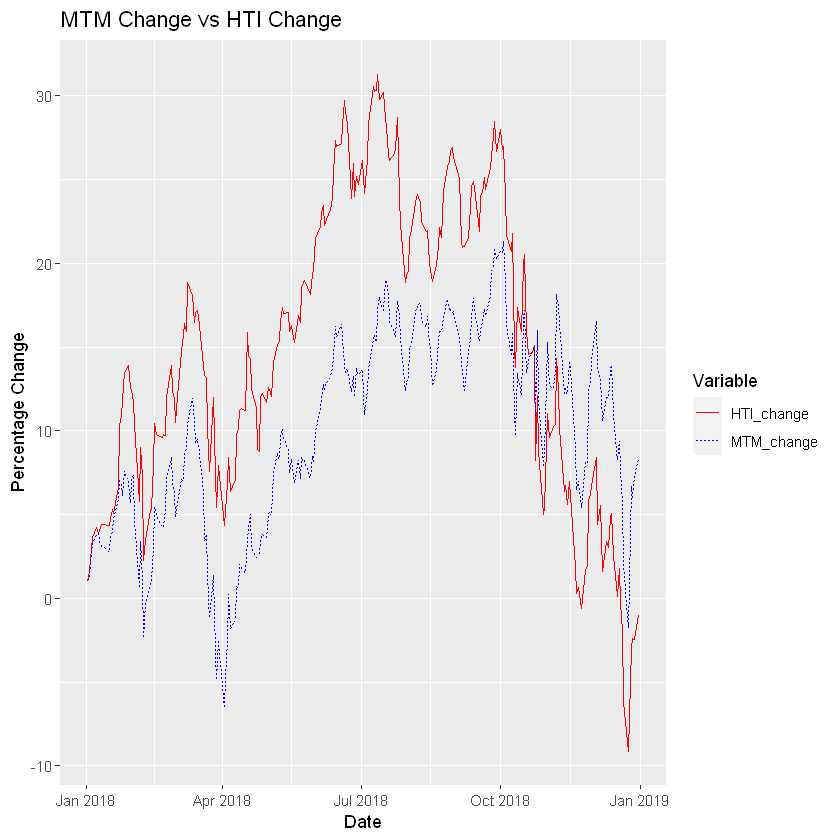

In [61]:
ggplot(data = comparison2, aes(x=Date, y=value))+geom_line(aes(color=Variable,linetype=Variable))+labs(x = "Date", y = "Percentage Change")+ggtitle("MTM Change vs HTI Change")+theme_gray()+scale_color_manual(values = c("red", "blue"))

# Second Figure - Change of MTM in JPY

In [62]:
jpy = read.csv("JPY.csv")

In [63]:
jpy = jpy[,c(1,5)]
jpy = jpy[-1,]
head(jpy)

,Date,Close
,<chr>,<dbl>
2,1/2/2018,112.770
3,1/3/2018,112.244
4,1/4/2018,112.607
5,1/5/2018,112.783
6,1/8/2018,113.154
7,1/9/2018,113.141


In [64]:
#format column datatype, merge with existing mtm change calculations 
jpy$Date= as.Date(jpy$Date, format = "%m/%d/%Y")
df_jpy=merge(x=comparison, y=jpy, all.x=TRUE)
head(df_jpy)

,Date,HTI,MTM,HTI_change,MTM_change,Close
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,95.20607,5000000,1.000000,1.000000,112.770
2,2018-01-03,96.71516,5061154,1.585074,1.223084,112.244
3,2018-01-04,97.39206,5103664,2.296060,2.073270,112.607
4,2018-01-05,98.65980,5164091,3.627637,3.281811,112.783
5,2018-01-08,99.23764,5187051,4.234572,3.741018,113.154
6,2018-01-09,98.90217,5192835,3.882214,3.856703,113.141


In [65]:
#calculate % mtm change in JPY
df_jpy = df_jpy %>% mutate(MTM_jpy = MTM*Close) %>% mutate(MTM_change_jpy = (MTM_jpy - MTM_jpy[1]) / MTM_jpy[1] * 100)
df_jpy[1,8]=1
head(df_jpy)

,Date,HTI,MTM,HTI_change,MTM_change,Close,MTM_jpy,MTM_change_jpy
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,95.20607,5000000,1.000000,1.000000,112.770,563849985,1.000000
2,2018-01-03,96.71516,5061154,1.585074,1.223084,112.244,568084205,0.750948
3,2018-01-04,97.39206,5103664,2.296060,2.073270,112.607,574708246,1.925736
4,2018-01-05,98.65980,5164091,3.627637,3.281811,112.783,582421611,3.293718
5,2018-01-08,99.23764,5187051,4.234572,3.741018,113.154,586935550,4.094274
6,2018-01-09,98.90217,5192835,3.882214,3.856703,113.141,587522554,4.198381


In [66]:
#same as above, melting for simplicity reasons 
df_jpy2 = df_jpy[,c(1,5,8)]
df_jpy2=melt(df_jpy2, id.vars = c("Date"))
names(df_jpy2)[2]="Variable"
head(df_jpy2)

,Date,Variable,value
,<date>,<fct>,<dbl>
1,2018-01-02,MTM_change,1.000000
2,2018-01-03,MTM_change,1.223084
3,2018-01-04,MTM_change,2.073270
4,2018-01-05,MTM_change,3.281811
5,2018-01-08,MTM_change,3.741018
6,2018-01-09,MTM_change,3.856703


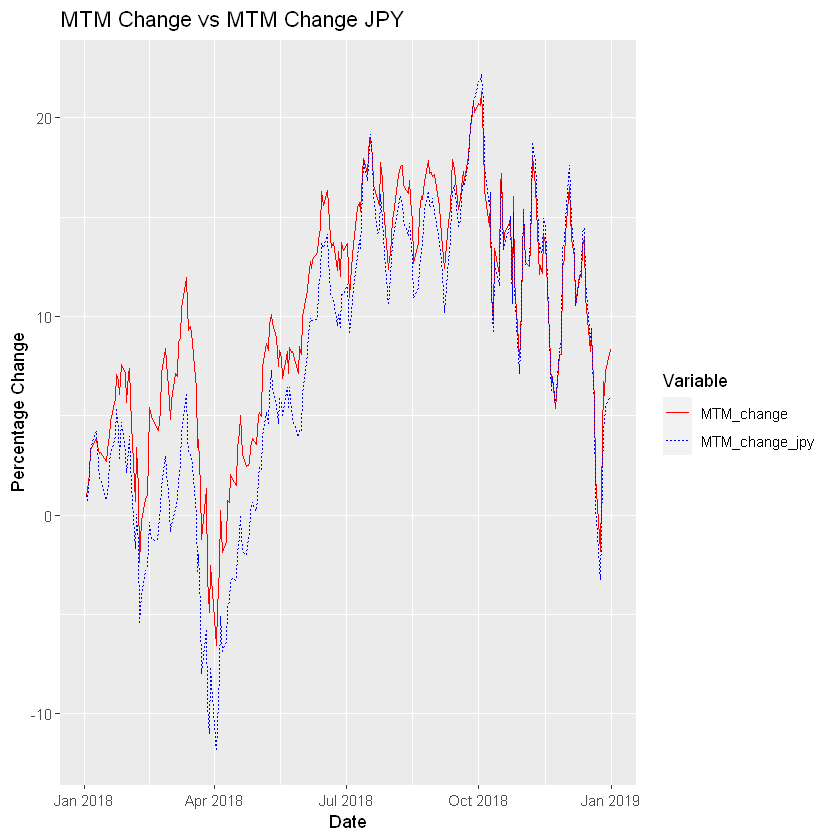

In [67]:
ggplot(data = df_jpy2, aes(x=Date, y=value))+geom_line(aes(color=Variable,linetype=Variable))+labs(x = "Date", y = "Percentage Change")+ggtitle("MTM Change vs MTM Change JPY")+theme_gray()+scale_color_manual(values = c("red", "blue"))

# Testing Rebalancing of Buying Low with Different Rebalancing Periods 

In [68]:
#same code as earlier, except minor tweak in the large for loop at end

In [69]:
percent_change_df = data.frame(Date = merged$Date)
for (i in universe){
    change = arrange(merged,Date) %>% transmute(Date, change = get(paste0("Adj.Close_", i))/lag(get(paste0("Adj.Close_", i)), n=5)) 
    percent_change_df <- merge(percent_change_df, change, by = "Date")
}
names(percent_change_df)= c("Date", "5Day%Change_IBM","5Day%Change_MSFT","5Day%Change_GOOG", "5Day%Change_AAPL", "5Day%Change_AMZN","5Day%Change_FB", "5Day%Change_NFLX","5Day%Change_TSLA","5Day%Change_ORCL","5Day%Change_SAP")
every_fifth_day= percent_change_df[seq(1, nrow(df), 5), ]
purchases = apply(every_fifth_day[2:length(every_fifth_day)], 1, function(row)tail(sort(row),5))
x = lapply(purchases, function(inner_list) {
  lapply(names(inner_list), function(subname) {
    return(subname)
  })
})
company_names = c()
for (element in x){
    for (company in element){
        name = str_remove(company, "5Day%Change_")
        company_names = c(company_names, name)
    }
}
buy = data.frame(Date = every_fifth_day$Date[-1],matrix(company_names, ncol=5, byrow=TRUE))
names(buy) = c("Date","Buy1","Buy2","Buy3","Buy4","Buy5")
buy = mutate(buy, Sell1 = c(NA,head(buy$Buy1, -1)))
buy =mutate(buy, Sell2 = c(NA,head(buy$Buy2, -1)))
buy = mutate(buy, Sell3 = c(NA,head(buy$Buy3, -1)))
buy= mutate(buy, Sell4 = c(NA,head(buy$Buy4, -1)))
buy = mutate(buy, Sell5 = c(NA,head(buy$Buy5, -1)))
close_prices = prices[,c(1,seq(2,21,2))]
names(close_prices) = c('Date', universe)
combined= merge(buy, close_prices, by="Date")
combined_copy = combined
close_prices2 = prices2[,c(1,seq(2,21,2))]
names(close_prices2) = c('Date', universe)
df3 = merge(x=combined_copy[,1:11],y=close_prices2, by ="Date", all=TRUE)
df3[1:5,2:6] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3[6:10,7:11] = matrix(c("IBM","MSFT","GOOG","AAPL","AMZN"),nrow=5,ncol=5,byrow=TRUE)
df3 = merge(df3,IBM_div, by="Date", all.x = TRUE)
df3 = merge(df3,MSFT_div, by="Date", all.x = TRUE)
df3 = merge(df3,AAPL_div, by="Date", all.x = TRUE)
df3 = merge(df3,ORCL_div, by="Date", all.x = TRUE)
df3 = merge(df3,SAP_div, by="Date", all.x = TRUE)
names(df3)[22:26] = paste0(universe_div, "_div")
df4=df3
for (i in seq(6,nrow(df3),5)){
        z=i+4
        df3[i:z,2:11] = df3[i,2:11]
}
for (i in 1:nrow(df3)){
    for (j in 2:6){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}
for (i in 1:nrow(df3)){
    for (j in 7:11){
        name = df3[i,j]
        if (name %in% names(df3)){
            price = df3[i,name]
            df3[i,j] = price
        }
    }
}
#handle dividend columns 
df3 = merge(df3, df4[,c(1,7:11)], by = "Date")
for (i in 2:nrow(df3)){
    for (j in 27:31){
        name = df3[i,j]
        if (name %in% names(df3)){
            div = df3[i,name]
            df3[i,j] = div
        }
    }
}
final_df = df3[,c(1:11,22:26)]
final_df[,seq(2,11,1)] = lapply(final_df[,seq(2,11,1)], as.double)
df2diff = merge(x=final_df,y=percent_change_df, by ="Date", all.y=TRUE)
df2diff = df2high[,1:16]
names(df2diff)[7:11]=c('Sell1','Sell2','Sell3','Sell4','Sell5')
cash = 5000000
shares_bin = c()
mtm = c()
frequency=6

#loop through each row (sell/buy dates)
for (i in 1:nrow(df2diff)){
    #on first day, just buy, since initializing portfolio 
    if (i == 1){
        #buy
        cashperstock = cash/5
        for (j in 2:6){
            shares = floor(cashperstock/df2diff[i,j])
            cash = cash - (shares*df2diff[i,j])  
            shares_bin = c(shares_bin,shares)
            }
        }
    else if((i-1)%%frequency ==0){         ###adjusting for strategy###
        #these are sell/buy days 
            for (j in 2:6){
            #sell
                received = shares_bin[j-1]*df2diff[i,j+5]
                cash = cash + received 
            }
            mtm = c(mtm,cash)
            shares_bin = c()
            cashperstock = cash/5
            for (j in 2:6){
                #buy 
                shares = floor(cashperstock/df2diff[i,j])
                cash = cash - (shares*df2diff[i,j])  
                shares_bin = c(shares_bin,shares)
            } 
        }
        
    else if (i>6){
        #non selling days (just have to calculate mtm)
            s=c()
            for (j in 2:6){
                z = shares_bin[j-1]*df2diff[i,j]
                s = c(s,z)
            }
                                    #dividend payment
            for (d in 12:16){
                if(!is.na(df2diff[i,d])){
                    cash = cash+(shares_bin[d-11]*df2diff[i,d])
        }
            }
        summed= sum(s)
        mtm_intermed = cash+summed
        mtm = c(mtm,mtm_intermed)
         }
}       
df2diff$mtm = c(NA,NA,NA,NA,NA,NA,mtm)
head(df2diff,10)

Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the result"
Warning message in merge.data.frame(percent_change_df, change, by = "Date"):
"column names 'change.x', 'change.y', 'change.x', 'change.y', 'change.x', 'change.y' are duplicated in the 

,Date,Buy1,Buy2,Buy3,Buy4,Buy5,Sell1,Sell2,Sell3,Sell4,Sell5,IBM_div,MSFT_div,AAPL_div,ORCL_div,SAP_div,mtm
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2018-01-02,147.4665,85.95000,53.2500,43.0650,59.4505,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2018-01-03,151.5201,86.35000,54.1240,43.0575,60.2100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,2018-01-04,154.5889,87.11000,54.3200,43.2575,60.4795,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,2018-01-05,155.3442,88.19000,55.1115,43.7500,61.4570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,2018-01-08,156.2811,88.28000,55.3470,43.5875,62.3435,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,2018-01-09,209.3100,22.24600,62.6350,49.0600,156.6252,156.6252,88.22,55.3130,43.5825,62.6350,NA,NA,NA,NA,NA,NA
7,2018-01-10,212.5200,22.32000,62.7165,48.8000,156.9599,156.9599,87.82,55.1305,43.5725,62.7165,NA,NA,NA,NA,NA,5188162
8,2018-01-11,217.2400,22.53000,63.8340,48.9500,156.9790,156.9790,88.08,55.2760,43.8200,63.8340,NA,NA,NA,NA,NA,5242771
9,2018-01-12,221.2300,22.41467,65.2600,49.5100,155.9656,155.9656,89.60,56.1130,44.2725,65.2600,NA,NA,NA,NA,NA,5285689


In [70]:
#rebalancing every 6 days, instead of 5, positively increased the EOY MTM